# MicroVision Classification Challenge

The goal of this task is to understand your approach in solving a hand gesture classification problem using a dataset comprising of depth images obtained from a Kinect v2 Camera (obtained from [Kaggle](https://www.kaggle.com/gti-upm/depthgestrecog) and redistributed under the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 License)](https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode). 

The database is composed by 11 different hand-gestures that are performed by 6 different subjects. The goal of the task is to classify a given frame into one of the 11 gesture classes. The dataset consists of static and dynamic(time-varying gestures: like palm_lr, thumb_ud). For the purpose of this task you can choose to consider all gestures to be static and time-independent.

The database is structured in different folders as (a detailed description can be found below):

    /fist (fist hand-gesture)
        /fist/video_base_1 (base fist hand-gesture of subject 1)
            /fist/video_base_1/s01_g10_011_1.png,...,s01_g10_050_1.png,...
        /fist/video_base_2 (base fist hand-gesture of subject 2)
            /fist/video_base_2/s02_g10_011_1.png,...,s02_g10_050_1.png,...
        /fist/video_base_6 (base fist hand-gesture of subject 6)
            /fist/video_base_6/s06_g10_011_1.png,...,s06_g10_050_1.png,...
        /fist/video_moved_1_1 (moved up fist hand-gesture of subject 1)
            /fist/video_moved_1_1/s01_g10_011_2.png,...,s01_g10_050_2.png,...
        /fist/video_moved_1_2 (moved down fist hand-gesture of subject 1)
            /fist/video_moved_1_2/s01_g10_011_3.png,...,s01_g10_050_3.png,...
        /fist/video_moved_1_8 (moved up and left fist hand-gesture of subject 1)
        /fist/video_moved_1_8/s01_g10_011_9.png,...,s01_g10_050_9.png,...
        /fist/video_moved_6_1 (moved up fist hand-gesture of subject 6)
        /fist/video_moved_6_8 (moved up and left fist hand-gesture of subject 6)
    /grab
    /one_finger
    /palm (palm hand-gesture)
    /thumb_ud

Every root folder (fist, grab,...) contains the range images of one hand-gesture. The folder name is the identifier of the hand-gesture (for example fist, palm, thumb_ud,...).

Inside every root folder, there are 54 folders: 6 of them are the base hand-gestures (/fist/video_base_1,...,/fist/video_base_2) and the others are the moved hand-gestures used to increment the training samples (/fist/video_moved_1_1,...,/fist/video_moved_1_8,...,/fist/video_moved_6_1,...,/fist_video_moved_6_8). Inside every subfolder, there are a set of range hand images that can be true/positive samples or false/negative samples. The structure of the name of each frame is the same: sXX_gYY_ZZZ_M.png where: - XX is the subject identifier. - YY is the gesture identifier. - ZZZ is the number of the frame. - M indicates if the frame belongs to the base video (M = 1) or if it belongs to a moved video (M=2,...9).

For example, the frame 's02_g_05_060_1' indicates that the frame belongs to the fifth gesture, which is performed by the second subject, it is the frame number 60, and it belongs to the base video.

Some of the code snippets below may have bugs and/or can be optimized to improve performance. Feel free to correct and improve the code by editing and adding to the appropriate cells.

If you do not have access to the computing resources required to train a ML based network, please include the full network architecture you propose, and fully functional code that will allow us to train the model on our end. You are free to choose the deep learning framework of your choice, or you may use an approach that is not deep learning based. 

The model must generalize to obtain high accuracy on data that was not included while training. Accuracy will be tested on a hidden test set.

We expect you not to have to spend more than 4 hours on this task, including training time. Please feel free to mention in comments if there are further improvements you would have implemented in the future.

In [2]:
# Import any other libraries and frameworks you may be using

import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import scipy

### Below cell is used to create a Python dictionary that maps the gesture string to a class number. The code is not optimal and there is a bug in the code that prevents it from executing. Please make changes as necessary.

In [3]:
data_dir = "depthGestRecog/"

label_dict={}


for label in os.listdir(data_dir):
    for sub_dir in os.listdir(os.path.join(data_dir,label)):
        class_num = int(os.listdir(os.path.join(data_dir,label,sub_dir))[0][5:7])

    label_dict[label] = class_num    


### Starter code to load data has been provided. Edit as necessary to change dimensions and optimize

In [4]:
x = []
y = []
for root, _, files in os.walk(data_dir):
    for i in range(len(files)):
        x.append((plt.imread((os.path.join(root,files[i])))))
        y.append((int(files[i][5:7])))
        
x = np.asarray(x, dtype=np.float32)
y = np.asarray(y)

### To Do: Convert labels to one-hot encoded vectors

In [5]:
# Please implement (from scratch) a function that converts the labels to one-hot encoded vectors

y_onehot = np.zeros((y.shape[0], len(label_dict)))
for i in range(y.shape[0]):
    y_onehot[i][y[i]-1] = 1

### To Do: Split dataset into training and validation sets

In [6]:
# You may perform this by using your own functions or using an existing library module

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.2)

n_train, n_test = x_train.shape[0], x_test.shape[0]

### To Do: Visualize a few entries from dataset (Use matplotlib/OpenCV/PIL libraries)

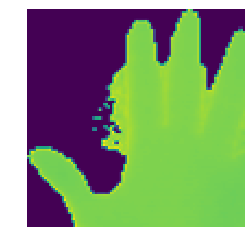

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


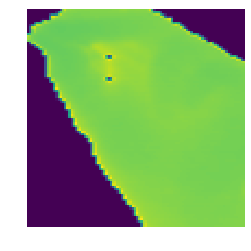

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
import matplotlib

for i in range(2):
    entry_image = x_train[i]
    plt.imshow(entry_image)
    plt.axis("off")
    plt.show()
    print(y_train[i])

### To Do (Optional): Perform pre-processing/augmentation/fine-tuning if necessary

In [11]:
#downsample images to 25x25
x_train_downsampled = np.zeros((n_train, 25, 25))
for i in range(x_train.shape[0]):
    x_train_downsampled[i] = x_train[i][::4,::4]

x_test_downsampled = np.zeros((n_train, 25, 25))
for i in range(x_test.shape[0]):
    x_test_downsampled[i] = x_test[i][::4,::4]
    
#normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_temp = x_train_downsampled.transpose(1,2,0).reshape(625, -1)
x_test_temp = x_test_downsampled.transpose(1,2,0).reshape(625, -1)

scaler.fit(x_train_temp)
x_train_normalized = scaler.transform(x_train_temp)

scaler.fit(x_test_temp)
x_test_normalized = scaler.transform(x_test_temp)

### To Do: Define Network Architecture and Hyperparameters


In [1]:
x_train = x_train_normalized.transpose(1,0)
x_test = x_test_normalized.transpose(1,0)

#Define learning_rate, n_of_epochs, batch_size etc.
batch_size = 50

#Please mention in comments your rationale behind selecting architecture, loss function, optimizers and  
#other hyperparameters, with an overview of approach taken 

import tensorflow as tf
sess = tf.InteractiveSession()

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Create the model
x = tf.placeholder("float", [None, 625])
y_ = tf.placeholder("float", [None, 11])

W = tf.Variable(tf.zeros([625,11]))
b = tf.Variable(tf.zeros([11]))

y = tf.nn.softmax(tf.matmul(x,W) + b)

# first convolutinal layer
w_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 25, 25, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# second convolutional layer
w_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# densely connected layer
w_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

# dropout
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# readout layer
w_fc2 = weight_variable([1024, 11])
b_fc2 = bias_variable([11])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

# train and evaluate the model
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.GradientDescentOptimizer(1e-3).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.initialize_all_variables())

for i in range(20000):
    perm = np.arange(n_train)
    np.random.shuffle(perm)
    x_train = x_train[perm]
    y_train = y_train[perm]
    batch = x_train[0:batch_size], y_train[0:batch_size]
    #if i%100 == 0:
        #train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_:batch[1], keep_prob:1.0})
        #print("step %d, train accuracy %g" %(i, train_accuracy))
    train_step.run(feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})

#print("test accuracy %g" % accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0}))


NameError: name 'x_train_normalized' is not defined

### To Do: Plot Training/Validation Losses, and Calculate Accuracy

In [2]:
# 1) Using matplotlib, plot training loss, validation loss, training accuracy and 
#    validation accuracy with respect to epochs

# 2) Define a function that takes in as input an array of 'n' images, and a list of 'n' corresponding 
#    class labels, and returns average classification accuracy.